Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
2025 - Bimestre 5 <br>


<h1><center> Procesamiento de Lenguaje Natural

Ayudantía 2: Word2Vec </center></h1>
        **Profesor**: Marcelo Mendoza<br>
        **Ayudante**: Miguel Fernández

---

#Instalar librerías

Para trabajar con el modelo word2vec, es necesario instalar la siguiente librería.

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 13.2 MB/s eta 0:00:00


# Cargar dataset

En primer lugar, se debe cargar el conjunto de datos.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/film_affinity.csv")

In [ ]:
df

,critica,nota,url
0,"Bueno, bajo mi gusto, otro fracaso más de DC. ...",3,https://www.filmaffinity.com/es/reviews/1/4208...
1,Es tan terrible que podría funcionar como paro...,1,https://www.filmaffinity.com/es/reviews/1/4208...
2,Tengo una tradición desde hace más de 5 años. ...,2,https://www.filmaffinity.com/es/reviews/1/4208...
3,No entiendo como nadie tiene la cara de presen...,1,https://www.filmaffinity.com/es/reviews/1/4208...
4,La primera entrega de Wonder Woman (2017) no m...,4,https://www.filmaffinity.com/es/reviews/1/4208...
...,...,...,...
4795,"""Shrek"" es sin lugar a dudas una de las mejore...",9,https://www.filmaffinity.com/es/reviews/6/4945...
4796,"Muy buena e incluso diría, inteligente comedia...",8,https://www.filmaffinity.com/es/reviews/3/9420...
4797,Cuando una película consigue hacer que algo ta...,7,https://www.filmaffinity.com/es/reviews/3/9420...
4798,Una gran comedia estupida que cumple su funció...,8,https://www.filmaffinity.com/es/reviews/3/9420...


A continuación, se presenta un gráfico con la cantidad de ejemplos por clase.

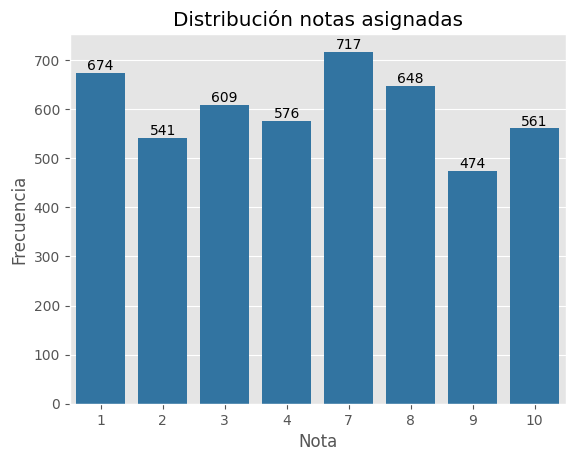

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
ax = sns.countplot(data=df, x="nota",color="tab:blue")
ax.set_title("Distribución notas asignadas")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Nota")
ax.bar_label(ax.containers[0])
plt.show()

Dado que el texto está en español, se debe trabajar con la versión de spacy **es_core_news_sm**.

!python3 -m spacy download es_core_news_sm

In [ ]:
!python3 -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 31.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#Preprocesamiento

En la siguiente celda se define una función para preprocesar el texto.

In [ ]:
import string
import re
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

nlp = spacy.load("es_core_news_sm") # instanciar el modelo en español de spacy
REGX_USERNAME = r"@[A-Za-z0-9$-_@.&+]+"

def preprocessing(text):
  text = text.lower() #llevar todo a minúscula
  text = re.sub(REGX_USERNAME, ' ', text) #procesar caracteres especiales
  tokens = [token.text for token in nlp(text)]
  tokens = [t for t in tokens if t not in STOP_WORDS and t not in string.punctuation and len(t) > 2] #filtrar casos con menos de una palabra, eliminar stopwords
  tokens = [t for t in tokens if not t.isdigit()]

  return " ".join(tokens)

Se aplica la función preprocessing a la variable "critica" y se almacena en text_clean (demora 5 minutos).

In [ ]:
df["text_clean"] = df["critica"].apply(preprocessing)

Se crea la variable binaria sentiment considerando la nota asignada. Esta columna se incorpora al dataframe.

In [ ]:
df["sentiment"] = df.apply(lambda x: 0 if int(x["nota"]) < 5  else 1, axis=1)

In [ ]:
df.head()

,critica,nota,url,text_clean,sentiment
0,"Bueno, bajo mi gusto, otro fracaso más de DC. ...",3,https://www.filmaffinity.com/es/reviews/1/4208...,gusto fracaso empezó año aves presa acaba año ...,0
1,Es tan terrible que podría funcionar como paro...,1,https://www.filmaffinity.com/es/reviews/1/4208...,terrible funcionar parodia sobreactuada record...,0
2,Tengo una tradición desde hace más de 5 años. ...,2,https://www.filmaffinity.com/es/reviews/1/4208...,tradición años diciembre cine blockbuster peli...,0
3,No entiendo como nadie tiene la cara de presen...,1,https://www.filmaffinity.com/es/reviews/1/4208...,entiendo cara presentar película entiendo crít...,0
4,La primera entrega de Wonder Woman (2017) no m...,4,https://www.filmaffinity.com/es/reviews/1/4208...,entrega wonder woman pareció maravilla contrar...,0


A continuación, se verifica que la clasificación es correcta.

In [ ]:
df[df["sentiment"]==0].nota.value_counts()

,count
nota,
1,674
3,609
4,576
2,541


In [ ]:
df[df["sentiment"]==1].nota.value_counts()

,count
nota,
7,717
8,648
10,561
9,474


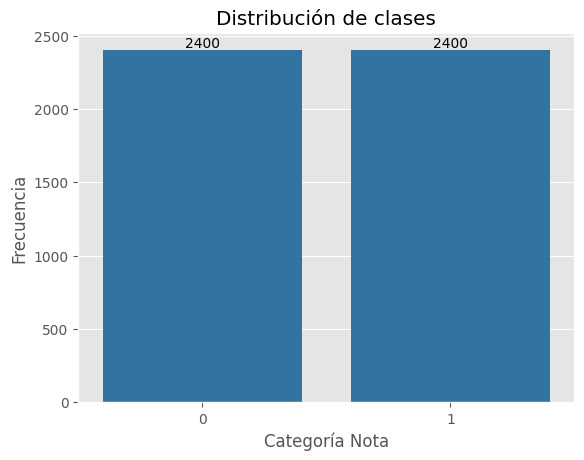

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
ax = sns.countplot(data=df, x="sentiment",color="tab:blue")
ax.set_title("Distribución de clases")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Categoría Nota")
ax.bar_label(ax.containers[0])
plt.show()

#Creación train-test-val

Se crean 3 conjuntos de datos:
* train (80%)
* val (10%)
* test (10%)

In [ ]:
df.shape

(4800, 5)

In [ ]:
from sklearn.model_selection import train_test_split
X = df["text_clean"]
y = df["sentiment"]

In [ ]:
#Separación entre train (90%) y test (10%) desde el conjunto completo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#Separación entre train y val desde el conjunto train definido anteriormente
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=480, random_state=42)

In [ ]:
print(f"X_train: {X_train.shape[0]}")
print(f"y_train: {y_train.shape[0]} \n")
print(f"X_val: {X_val.shape[0]}")
print(f"y_val: {y_val.shape[0]}\n")
print(f"X_test: {X_test.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 3840
y_train: 3840 

X_val: 480
y_val: 480

X_test: 480
y_test: 480


Para usar el tokenizador se debe intalar nltk

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

La siguiente función permite tokenizar cada sentencia del dataset.

In [ ]:
from nltk.tokenize import RegexpTokenizer, sent_tokenize

tokenizer = RegexpTokenizer('[\'a-zA-Z]+')
def tokenize(document):
    words = []
    for sentence in sent_tokenize(document):
        tokens = [t.lower() for t in tokenizer.tokenize(sentence) if len(t) > 2]
        words += tokens
    return words

In [ ]:
corpus_words = [] #Lista de listas de palabras que componen una sentencia. Esta estructura espera el modelo de word2vec

for raw_text in X_train.to_list():
    words = tokenize(raw_text)
    corpus_words.append(words)

In [ ]:
df.critica[0]

'Bueno, bajo mi gusto, otro fracaso más de DC. Empezó el año con Aves de Presa y acaba el año con Wonder Woman. Dos películas malas con ganas. \r\n \r\nEn esta película, destacan los 37 slow motions que le han metido, junto con unos efectos especiales no de segunda, sino de tercera categoría. Te ves las de Spiderman de Sam Reimi que son de hace 15 años, y piensas que son mucho más modernas que éstas. \r\n \r\nMención aparte, los minutos que sale Wonder Woman como tal. Si hubiera tenido cronómetro en mano, yo creo que no llegan a los 15 minutos totales en pantalla. No olvidemos que semejante película dura nada más y nada menos que 150 minutos. \r\n \r\nQue está ambientada en los 80, te lo tienes que creer porque lo pone en el título y porque te dan 4 pinceladas de ello. Por lo demás, 0 relevancia tiene en la película, no se nota que esté en los 80 como tal. Más bien parece una acción totalmente comercial con el tirón que existe ahora. \r\n \r\nRespecto al argumento, poco que decir. Poco

In [ ]:
corpus_words[:2]

[['mundo',
  'destaca',
  'bondades',
  'padrino',
  'har',
  'lista',
  'malo',
  'nico',
  'malo',
  'pel',
  'cula',
  'veas',
  'estar',
  'condenado',
  'vida',
  'revisitarla',
  'frecuentemente',
  'pilles',
  'pping',
  'alguien',
  'diga',
  'apetece',
  'padrino',
  'quedar',
  'pegado',
  'butaca',
  'horas',
  'remedio',
  'cosa',
  'mala',
  'quedas',
  'ganas',
  'cosas',
  'sonny',
  'clemenza',
  'tessio',
  'fredo',
  'barzini',
  'neri',
  'luca',
  'brasi',
  'gigantescos',
  'carism',
  'ticos',
  'personajes',
  'secundarios',
  'pueblan',
  'trama',
  'pel',
  'cula',
  'excusas',
  'verla',
  'auna',
  'cine',
  'calidad',
  'entretenimiento',
  'forma',
  'igualada',
  'empujar',
  'resto',
  'trilog',
  'excelentes',
  'pel',
  'cula',
  'tiempos'],
 ['serie',
  'feeling',
  'adolescentes',
  'mundo',
  'deber',
  'serie',
  'idea',
  'abierta',
  'sexualidad',
  'colegios',
  'fallan',
  'darles',
  'educaci',
  'personajes',
  'perfectamente',
  'amables',
  

#Aplicación de Word2Vec

A continuación, se crea el objeto model para crear embeddings en función del corpus creado anteriormente.

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=corpus_words,
                 vector_size=50, #Tamaño del embedding
                 window=4, #ventana considerada
                 min_count=2, #Ignora todas las palabras con un número menor a 2
                 sg=1) #con 1 se trabaja con skip-gram

En la siguiente celda se presentán palabras similares a excelente.

In [ ]:
model.wv.similar_by_word('excelente')

[('excepcional', 0.9518408179283142),
 ('impresionante', 0.9517847895622253),
 ('soberbia', 0.9479108452796936),
 ('espectacular', 0.947566568851471),
 ('compuesta', 0.946370005607605),
 ('bso', 0.9418780207633972),
 ('destaca', 0.9416521787643433),
 ('estupenda', 0.9385371208190918),
 ('brillante', 0.9384781122207642),
 ('memorable', 0.9345085024833679)]

#Keras

A continuación, se entrenará un perceptrón multicapa (MLP por sus siglas en inglés) para realizar la clasificación. Para esto, se trabajará con el framework keras.

**Observación**

En general, el entrenamiento de redes neuronales requiere GPUs. Sin embargo, este ejemplo está diseñado para trabajar solo con CPU. Considerar que el uso de GPU es por tiempo limitado.

Más información en: https://keras.io/

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Para el correcto funcionamiento de la red es necesario asegurar que el largo de las oraciones es el mismo. Esto se realiza mediante el proceso de padding.

Como ejemplo, supongamos que se limita el largo a 6 palabras:

* quiero aprender inteligencia artificial **[PAD] [PAD]**
* **quiero aprender inteligencia artificial para entrenar** ~~modelos de lenguaje~~

## Padding

In [ ]:
max_tokens = 50 #Máximo de tokens por secuencia
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_vect = pad_sequences(tokenizer.texts_to_sequences(X_train.to_list()), maxlen=max_tokens, padding="post", truncating="post")
X_val_vect  = pad_sequences(tokenizer.texts_to_sequences(X_val.to_list()), maxlen=max_tokens, padding="post", truncating="post")
X_test_vect  = pad_sequences(tokenizer.texts_to_sequences(X_test.to_list()), maxlen=max_tokens, padding="post", truncating="post")

print(f"train: {X_train_vect.shape} \n val: {X_val_vect.shape} \n test: {X_test_vect.shape}")

train: (3840, 50) 
 val: (480, 50) 
 test: (480, 50)


A continuación, se observa un ejemplo de lo que hace el tokenizador.

In [ ]:
tokenizer.texts_to_sequences(["mundo destaca bondades padrino haré lista"])

[[9, 654, 12978, 582, 5631, 865]]

A continuación, se presenta la asignación de valores enteros a cada palabra.

In [ ]:
tokenizer.index_word

{1: '\r',
 2: 'película',
 3: 'historia',
 4: 'cine',
 5: 'personajes',
 6: 'películas',
 7: 'vida',
 8: 'serie',
 9: 'mundo',
 10: 'años',
 11: 'film',
 12: 'obra',
 13: 'forma',
 14: 'personaje',
 15: 'visto',
 16: 'director',
 17: 'tiempo',
 18: 'guión',
 19: 'escenas',
 20: 'momento',
 21: 'espectador',
 22: 'cosas',
 23: 'actores',
 24: 'cinta',
 25: 'escena',
 26: 'tipo',
 27: 'gente',
 28: 'protagonista',
 29: 'crítica',
 30: 'acción',
 31: 'momentos',
 32: 'trama',
 33: 'humor',
 34: 'sentido',
 35: 'cosa',
 36: 'minutos',
 37: 'original',
 38: 'amor',
 39: 'the',
 40: 'caso',
 41: 'mala',
 42: 'peli',
 43: 'punto',
 44: 'música',
 45: 'deja',
 46: 'efectos',
 47: 'lugar',
 48: 'terror',
 49: 'trabajo',
 50: 'realidad',
 51: 'comedia',
 52: 'queda',
 53: 'resulta',
 54: 'único',
 55: 'verla',
 56: 'idea',
 57: 'realmente',
 58: 'papel',
 59: 'falta',
 60: 'banda',
 61: 'hombre',
 62: 'interesante',
 63: 'argumento',
 64: 'protagonistas',
 65: 'sonora',
 66: 'hora',
 67: 'mujer'

## Matriz embeddings

A continuación, se crea la matriz de embeddings.

In [ ]:
import numpy as np
vectors_w2v = np.asarray(model.wv.vectors)
labels_w2v = np.asarray(model.wv.index_to_key)

In [ ]:
#esta celda demora 1 minuto

embed_len = 50 #Dimensión de embedding

w2v_embeddings = np.zeros((len(tokenizer.index_word)+1, embed_len)) # Notar que se suma 1 por un token especial que necesita keras para asignar a las palabras desconocidas.

for idx, word in tokenizer.index_word.items():
    if word in labels_w2v:
        w2v_embeddings[idx] = vectors_w2v[int(np.where(labels_w2v == word)[0][0])]

In [ ]:
w2v_embeddings.shape

(51106, 50)

Cada fila de esta matriz corresponde a una palabra del vocabulario, la cual tiene una representación vectorial de dimensión 50. Recordar que la dimensionalidad del embedding es un hiperparámetro definido por el modelador.

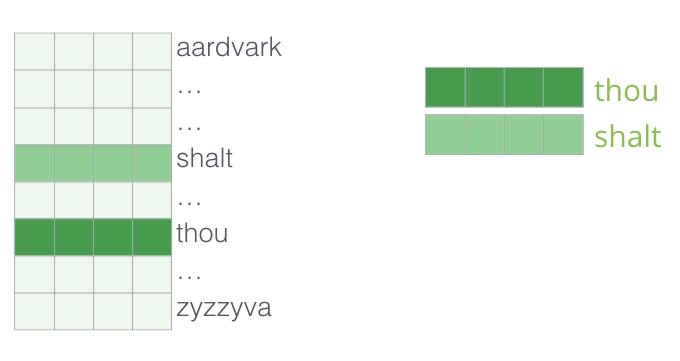

##Entrenar MLP

In [ ]:
# import tensorflow

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model

inputs = Input(shape=(max_tokens,))

embeddings_layer = Embedding(
    input_dim=len(tokenizer.index_word)+1,
    output_dim=embed_len,
    trainable=False,
    weights=[w2v_embeddings]
)

dense1 = Dense(256, activation="relu")
dense2 = Dense(64, activation="relu")
dense3 = Dense(256, activation="relu") #no se utiliza
dense4 = Dense(2, activation="softmax") # depende de los posibles valores de la variable de respuesta. En este caso es una tarea binaria.

x = embeddings_layer(inputs)
x = GlobalAveragePooling1D()(x)  # Esta función permite agregar las representaciones vectoriales de cada palabra que compone una frase
x = dense1(x)
x = dense2(x)
z = dense3(x) #estas capas se puede incluir o no en la arquitectura
outputs = dense4(x) # notar que esto la salida de "dense 2"

model = Model(inputs=inputs, outputs=outputs)

A continuación, se puede observar el detalle de los parámetros de la red creada.

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 50, 50)         │     2,555,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 50)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,584,934 (9.86 MB)

 Trainable params: 29,634 (115.76 KB)

 Non-trainable params: 2,555,300 (9.75 MB)

A continuación, se compila el modelo definiendo el optimizador, función de pérdida y métrica de evaluación.

In [ ]:
model.compile(optimizer="adam", #optimizador
              loss="sparse_categorical_crossentropy", #función de pérdida que se ajusta al problema de clasificación multiclase.
              metrics=["accuracy"]) #métrica de evaluación

In [ ]:
history = model.fit(X_train_vect, # representación vectorial de entrada
                    y_train, # label de salida
                    batch_size=32, #tamaño de lote que será utilizado en cada step
                    epochs=20, #número de épocas
                    validation_data=(X_val_vect, y_val)) # definir el set para validar el entrenamiento

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5722 - loss: 0.6724 - val_accuracy: 0.6812 - val_loss: 0.5940
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6587 - loss: 0.6160 - val_accuracy: 0.7125 - val_loss: 0.5730
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6775 - loss: 0.5995 - val_accuracy: 0.6938 - val_loss: 0.5702
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6949 - loss: 0.5871 - val_accuracy: 0.7125 - val_loss: 0.5617
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6983 - loss: 0.5793 - val_accuracy: 0.7167 - val_loss: 0.5568
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7065 - loss: 0.5779 - val_accuracy: 0.7125 - val_loss: 0.5521
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6946 - loss: 0.5895 - val_accuracy: 0.7063 - val_loss: 0.5615
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6956 - loss: 0.5832 - val_accuracy: 0.

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


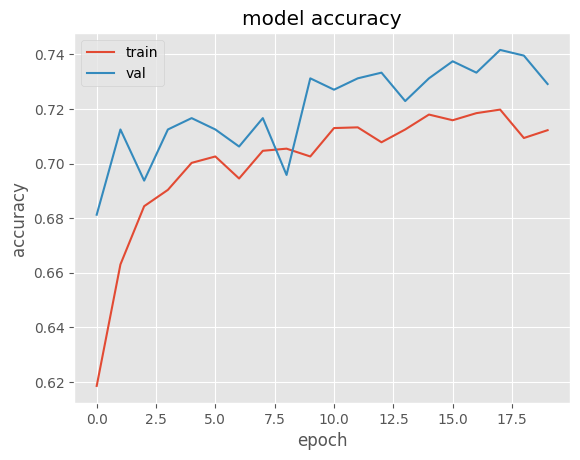

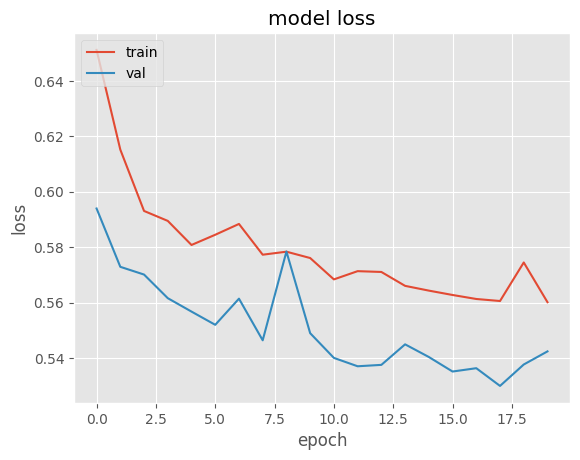

In [ ]:
# Para accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Para función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Métricas de evaluación

Se obtienen las predicciones.

In [ ]:
y_test = np.asarray(y_test)
y_pred = model.predict(X_test_vect).argmax(axis=-1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
y_test

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,

Se calculan las métricas de evaluación.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       248
           1       0.70      0.77      0.73       232

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



#Trabajar con modelos pre-entrenados

##Importar usando Gensim

Ver sitio: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Se trabajará con glove-wiki-gigaword-50

In [ ]:
glove_wiki_50 = gensim.downloader.load('glove-wiki-gigaword-50') #tiene un tamaño de 66 MB.

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
glove_wiki_50.similar_by_word('peace')

[('reconciliation', 0.9170552492141724),
 ('unity', 0.850257396697998),
 ('talks', 0.8138390779495239),
 ('negotiations', 0.8107652068138123),
 ('progress', 0.8098476529121399),
 ('accord', 0.8095232248306274),
 ('ceasefire', 0.8048483729362488),
 ('commitment', 0.7958491444587708),
 ('truce', 0.7929693460464478),
 ('peaceful', 0.7838729619979858)]

In [ ]:
import numpy as np
vectors_glove_50 = np.asarray(glove_wiki_50.vectors)
labels_glove_50 = np.asarray(glove_wiki_50.index_to_key)

In [ ]:
labels_glove_50.shape

(400000,)

In [ ]:
vectors_glove_50.shape

(400000, 50)